In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.dates import DateFormatter
import matplotlib.gridspec as gridspec
import pandas as pd
import os

def create_video(df, plot_key, filename, title="Joule over Time", fmt="mp4", window=10):
    fig = plt.figure(figsize=(15, 4.8))
    gs  = gridspec.GridSpec(1, 2,
            width_ratios=[3, 7],
            wspace=0.00)

    axL = fig.add_subplot(gs[0], sharey=None)
    axR = fig.add_subplot(gs[1], sharey=axL)

    axL.set_ylabel('Energy (J)')
    axR.set_xlabel('Time')

    fig.suptitle(title)
    for ax in (axL, axR):
        ax.grid(True)
        ax.xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))


    for ax in fig.get_axes():
        ax.label_outer()

    #avg = df[plot_key].mean()

    #for ax in (axL, axR):
    #    ax.axhline(avg, color='orange', linestyle='--', label='average')

    lnL, = axL.plot([], [], color='r')
    lnL2, = axL.plot([], [], color='g')
    lnL3, = axL.plot([], [], color='C0')
    lnR, = axR.plot([], [], color='r', label='idle')
    lnR2, = axR.plot([], [], color='g', label='preheat')
    lnR3, = axR.plot([], [], color='C0', label='generation')

    plt.legend(loc='upper right')

    xdata, ydata = df['start'], df[plot_key]

    def init():
        axL.set_xlim(df['start'][0], df['start'][window])
        #axL.set_ylim(df[plot_key].min()-1, df[plot_key].max()+1)
        #axL.set_ylim(df[plot_key].min()-1, df[plot_key].max()*1.)

        lnL.set_data(df[df['type'] == 'idle']["start"], df[df['type'] == 'idle'][plot_key])
        lnR.set_data(df[df['type'] == 'idle']["start"], df[df['type'] == 'idle'][plot_key])

        filtered_df1 = df[df['type'] == 'idle'].tail(1)
        filtered_df2 = df[df['type'] == 'preheat']
        combined_df = pd.concat([filtered_df1, filtered_df2], ignore_index=True)
        lnL2.set_data(combined_df["start"], combined_df[plot_key])
        lnR2.set_data(combined_df["start"], combined_df[plot_key])

        filtered_df1 = df[df['type'] == 'preheat'].tail(1)
        filtered_df2 = df[df['type'] == 'generation']
        combined_df = pd.concat([filtered_df1, filtered_df2], ignore_index=True)
        lnL3.set_data(combined_df["start"], combined_df[plot_key])
        lnR3.set_data(combined_df["start"], combined_df[plot_key])

        lnL.set_visible(False)

        axR.set_xlim(df['start'][0], df['start'][window])
        axR.set_ylim(df[plot_key].min()-1, df[plot_key].max()+1)

        return lnL, lnL2, lnL3, lnR, lnR2, lnR3

    def update(frame):
        if frame > window:

            lnL.set_visible(True)
            axL.set_xlim(xdata[0], xdata[update.counter])
            axL.set_xticks([xdata[0], xdata[update.counter]])

            axR.set_xlim(xdata[update.counter], xdata[update.counter+window])
            axR.set_xticks(xdata[update.counter:update.counter+window])
            update.counter += 1

        return lnL, lnL2, lnL3, lnR, lnR2, lnR3

    update.counter = 1

    ani = FuncAnimation(fig, update, frames=range(window,len(df)),
                        init_func=init, blit=True, interval=500)

    os.makedirs("./output", exist_ok=True)
    ani.save(f"./output/{filename}.{fmt}")
    plt.savefig(f"./output/{filename}.png")


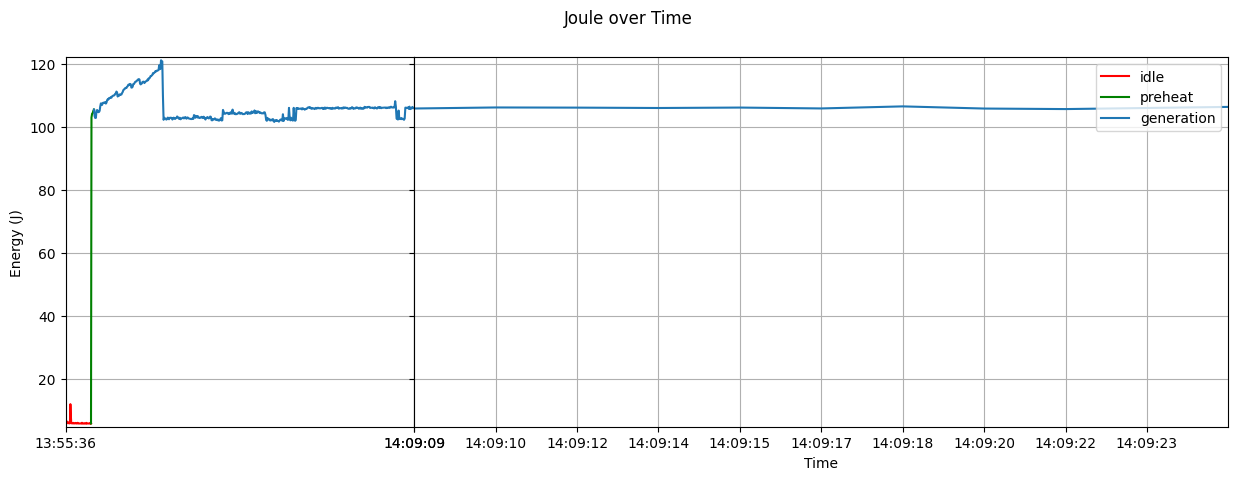

In [2]:
import pandas as pd
params = [
    {"path":"/home/student/energy/cp_gpt2-s256-t2048-l1-h2-e256_gte_1s/2/energy_verbose.csv", "plot_key":"cpu_energy(J)", "filename":"office_cp_gpt2-s256-t2048-l1-h2-e256_gte_1s"},
    #{"path":"/home/student/energy/cp_gpt2-s256-t2048-l2-h4-e256_same_token/2/energy_verbose.csv", "plot_key":"cpu_energy(J)", "filename":"office_cp_gpt2-s256-t2048-l2-h4-e256_same_token"},
    #{"path":"/home/student/energy/cp_gpt2-s512-t2048-l2-h4-e512_same_token/2/energy_verbose.csv", "plot_key":"cpu_energy(J)", "filename":"office_cp_gpt2-s512-t2048-l2-h4-e512_same_token"},
    #{"path":"/home/student/energy_gaming/cp_gpt2-s256-t2048-l1-h2-e256_gte_1s/2/energy_verbose.csv", "plot_key":"gpu_energy(J)", "filename":"gaming_cp_gpt2-s256-t2048-l1-h2-e256_gte_1s"},
    #{"path":"/home/student/energy_gaming/cp_gpt2-s256-t2048-l2-h4-e256_same_token/2/energy_verbose.csv", "plot_key":"gpu_energy(J)", "filename":"gaming_cp_gpt2-s256-t2048-l2-h4-e256_same_token"},
    #{"path":"/home/student/energy_gaming/cp_gpt2-s512-t2048-l2-h4-e512_same_token/2/energy_verbose.csv", "plot_key":"gpu_energy(J)", "filename":"gaming_cp_gpt2-s512-t2048-l2-h4-e512_same_token"},
    #{"path":"/home/student/energy_server/gpt2-s256-t2048-l1-h2-e256_gte_1s/1/energy_verbose.csv", "plot_key":"cpu_energy(J)", "filename":"server_gpt2-s256-t2048-l1-h2-e256_gte_1s"},
    #{"path":"/home/student/energy_server/gpt2-s256-t2048-l2-h4-e256_same_token/1/energy_verbose.csv", "plot_key":"cpu_energy(J)", "filename":"server_gpt2-s256-t2048-l2-h4-e256_same_token"},
    #{"path":"/home/student/energy_server/gpt2-s512-t2048-l2-h4-e512_same_token/1/energy_verbose.csv", "plot_key":"cpu_energy(J)", "filename":"server_gpt2-s512-t2048-l2-h4-e512_same_token"},
]


for param in params:
    df = pd.read_csv(param["path"], delimiter=";")
    df["start"] = pd.to_datetime(df["start"], unit="s", utc=True)
    df["start"] = df["start"].dt.tz_convert("Europe/Berlin").dt.tz_localize(None)
    df["end"] = pd.to_datetime(df["end"], unit="s", utc=True)
    df["end"] = df["end"].dt.tz_convert("Europe/Berlin").dt.tz_localize(None)
    df.drop(df.tail(1).index, inplace = True)

    create_video(df, param["plot_key"], param["filename"])